In [3]:
# coding: UTF-8
import matplotlib.pyplot as plt
import numpy as np
import sys
from math import pi, cos
from math import log10, floor, factorial
import pandas as pd
from collections import OrderedDict
from matplotlib.ticker import MultipleLocator
from scipy.optimize import curve_fit
import scipy.integrate as integrate
import scipy.misc as mic
import pynverse 


#file_id = sys.argv[1]
sample_number = 35.#float(sys.argv[2])
#file_id_str = str(file_id)
#title = str(sys.argv[3])

# Data table
data_matrix = pd.read_table('Karelle_revised_schechterOUTPUTfull.txt', sep=' ', names=('label','No','N80Mpc','N120Mpc','theta_c', 's', 'theta_obsGW'))


In [4]:
data_matrix

,label,No,N80Mpc,N120Mpc,theta_c,s,theta_obsGW
0,"1,2,1,1,-12,-30",3.698076e+06,9.672147e-08,2.023885e-07,1.000,3.519527,12.0
1,"1,2,1,1,-12,-29",1.689170e+06,1.270250e-07,2.903872e-07,1.611,4.355857,12.0
2,"1,2,1,1,-12,-28",9.838536e+05,1.551839e-07,3.766446e-07,2.223,5.186800,12.0
3,"1,2,1,1,-12,-27",6.505738e+05,1.818733e-07,4.618528e-07,2.833,6.059245,12.0
4,"1,2,1,1,-12,-26",4.650117e+05,2.075269e-07,5.465543e-07,3.445,7.007777,12.0
5,"1,2,1,1,-12,-25",3.505528e+05,2.323329e-07,6.308076e-07,4.055,8.062204,12.0
6,"1,2,1,1,-12,-24",2.745835e+05,2.564958e-07,7.149045e-07,4.667,9.260827,12.0
7,"1,2,1,1,-12,-23",2.214891e+05,2.800818e-07,7.987747e-07,5.278,10.647427,12.0
8,"1,2,1,1,-12,-22",1.827740e+05,3.032180e-07,8.826359e-07,5.889,12.286875,12.0
9,"1,2,1,1,-12,-21",1.536304e+05,3.259450e-07,9.664522e-07,6.500,14.266392,12.0


In [5]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#   astromomical parameters and the correction factors     |
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

c = 3.0*10**8   # [m/s]
H_o = 67.89/(3.0857*10**19) # [km/s/Mpc]*[Mpc/km]= [1/s]
Gpc = 3.0857*10**25 # [m/Gpc]
c_H_o = c/H_o/Gpc #[m]/[m/Gpc] = ~4.4[Gpc]
f_R = sample_number/107.
f_FOV = 0.1 # field of veiw
T = 12.6




In [6]:
def pickRF(dfmat2):
    '''
    It expects dfmats as an input
    It gives matrix in a form of pandas, choosing a RF
    Take average of LRD and calculate probability of the average value of LRD.

    '''
    RFnum = raw_input('which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:7')

    # take only a chosen RF 
    label_new = []
    No_new = []
    N80Mpc_new = []
    N120Mpc_new = [] 
    s_new = []
    theta_obsGW_new = []
    theta_c_new = []

    for ind in range(len(dfmat2['label'])):
        if dfmat2['label'][ind].split(',')[1] == RFnum:
            # take label only relevant to tmin, RF, theta_obsGW, theta_c
            label_tmin = dfmat2['label'][ind].split(',')[0]
            label_RF = dfmat2['label'][ind].split(',')[1]
            label_theta_obsGW = dfmat2['label'][ind].split(',')[4]
            label_theta_c = dfmat2['label'][ind].split(',')[5]
            modilabel = '%s,%s,%s,%s' %(label_tmin, label_RF, label_theta_obsGW, label_theta_c)
            label_new.append(modilabel)
            No_new.append(dfmat2['No'][ind])
            N80Mpc_new.append(dfmat2['N80Mpc'][ind])
            N120Mpc_new.append(dfmat2['N120Mpc'][ind])
            s_new.append(dfmat2['s'][ind])
            theta_obsGW_new.append(dfmat2['theta_obsGW'][ind])
            theta_c_new.append(dfmat2['theta_c'][ind])

    dfmat2RF = pd.DataFrame({'label':label_new,
                             'No':No_new,
                             'N80Mpc':N80Mpc_new,
                             'N120Mpc':N120Mpc_new,
                             's':s_new,
                             'theta_obsGW':theta_obsGW_new,
                             'theta_c':theta_c_new
                            })   

    # evaluate LF uncertainty 
    nonduplicatelabel = dfmat2RF.drop_duplicates('label')['label']
    Nomean = []
    Nostd = []
    N80Mpcmean = []
    N80Mpcstd = []
    N120Mpcmean = []
    N120Mpcstd = []
    for label in nonduplicatelabel:
        Nomean.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['No']).mean())
        Nostd.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['No']).std())
        N80Mpcmean.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['N80Mpc']).mean())
        N80Mpcstd.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['N80Mpc']).std())
        N120Mpcmean.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['N120Mpc']).mean())
        N120Mpcstd.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['N120Mpc']).std())

    df = pd.DataFrame({'label': nonduplicatelabel, 
                       'Nomean':Nomean, 
                       'Nostd':Nostd, 
                       'N80Mpcmean':N80Mpcmean,
                       'N80Mpcstd':N80Mpcstd,
                       'N120Mpcmean':N120Mpcmean,
                       'N120Mpcstd':N120Mpcstd,
                       'theta_c' : pd.to_numeric(dfmat2RF.drop_duplicates('label')['theta_c']),
                       's' : pd.to_numeric(dfmat2RF.drop_duplicates('label')['s']),
                       'theta_obsGW':pd.to_numeric(dfmat2RF.drop_duplicates('label')['theta_obsGW'])
                      })
    
    # local rate density [1/yr/Gpc^3]
    df['LRDmean'] = df['Nomean']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 
    df['LRDstd'] = df['Nostd']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 
    
    # Poisson distribution with k events with a given average number of events l
    def P(k,l):
        return l**k*np.exp(-l)/factorial(k)

    # Probability to find k events with LRD and VT
    # l is given by LRD times VT
    def PrLRD(k,LRD, VT):
        '''
        For O2, simultaneous LIGO-observation time is 114days
        And I choose the ranage 88Mpc for NSNS. So VT is 4pi/3*(0.088)^3*114/365 = 8.9E-4 [Gpc^3 yr] for NSNS
        For O3, I choose the range 120Mpc and 1 yr with 100% duty cycle. So VT = 4pi/3*(0.12)^3 = 7.24E-3 [Gpc^3 yr]
        '''
        return P(k, LRD*VT)

    #O2
    # matirix with the order
    # lable, LRD, N100Mpc, N140Mpc, parameter(sigma or s), observation angle, cut-off angle, probability For Power law
    #df['promean'] = PrLRD(1, df['LRDmean'], 6.70*10**(-4))
    # probability 1 NSNS event occurring in O2
    df['promeanNSNS'] = PrLRD(1, df['LRDmean']*5./6., 8.9*10**(-4)) # NSNS
    
    # error of pro is given by error propagation from LRD 
    #df['prostd'] = abs(df['promean']*(1-df['LRDmean']*6.70*10**(-4)))*df['LRDstd']/df['LRDstd']
    df['prostdNSNS'] = abs(df['promeanNSNS']*(1-df['LRDmean']*5./6.*8.9*10**(-4)))*df['LRDstd']/df['LRDmean']

    # split label 
    label_st = np.array(df['label'])
    label_tmin = []
    label_RF = []
    label_theta_obsGW = []
    label_theta_c = []
    for ind in range(len(label_st)):
        #print(label_st[ind].split(',')[0])
        label_tmin.append(label_st[ind].split(',')[0])
        label_RF.append(label_st[ind].split(',')[1])
        label_theta_obsGW.append(label_st[ind].split(',')[2])
        label_theta_c.append(label_st[ind].split(',')[3])

    # add splitted labels
    df['label_tmin']=label_tmin
    df['label_RF']=label_RF
    df['label_theta_obsGW']=label_theta_obsGW
    df['label_theta_c']=label_theta_c
    
    return df 




### distribution of theta_c

In [7]:

    
def distribution_theta_c(df, tmin, theta_obsGW):
    '''
    Providing the distributio of theta_c with given df, t_min, theta_obsGW
    USAGE: P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=36)
    (method)
    for theta_c
    1. Extrapolate the number of NSNS events in O2, l, as a functiono of theta_c
    2. find Poisson(theta_c)
    3. find Jacobian dl/dtheta_c
    4. find the distribution of theta_c
    5. normalized that distribution to get the truncated distribution 
    6. find the median and the lower and upper bound of theta_c with 1-sigma
    '''
    # VT for NSNS  
    VT = 9.1*10**(-4)
    # fraction of NSNS to NSNS + NSBH 
    r_nsns = 5./6.
    
    
    # determine which tmin
    if tmin == '1Gyr':
        tmin_num = '1'
    elif tmin == '100Myr':
        tmin_num = '2'
    elif tmin == '20Myr':
        tmin_num = '3'
        
    def cda(f,x,h):
        '''
        find the 1st order derivative of a given function 
        '''
        return (f(x+h)-f(x-h))/(2*h)
    
    #======================================
    # getting the values of theta_c and the number of NSNS events in O2
    #======================================
    
    # the theta_c data series, theta_c starts with 0.1 degs
    xdata = df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['theta_c'].values.tolist()
    # the NSNS average events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    ydata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDmean']*r_nsns*VT).values.tolist()

   
    #+++++++++++++++++++++++++++++++++++++
    # functions for evaluating the error |
    #+++++++++++++++++++++++++++++++++++++

    def avg(x):
        return sum(x)/float(len(x))

    def sst(x):
        sum=0.0
        xbar=avg(x)
        for i in range(len(x)):
            sum += (x[i]-xbar)**2
        return sum

    def ssr(x,y,model,params):
        sum = 0.0
        for i in range(len(y)):
            sum += (y[i] - model(x[i],*params))**2
        return sum

    def fitstats(fit, model):
        #Fit statistics
        fitparams=fit[0]
        cov=fit[1]                      #Covariance matrix
        dof=len(xdata)-len(fitparams)   #degrees of freedom
        chisqr=ssr(xdata,ydata,model,fitparams)     #chi-square is sum of squares of diagonal covariance
        errbars=20

        #Computer uncertainties in estimated parameters from covariance matrix and reduced chisqr
        del_params=[]
        for i in range(len(fitparams)):
            del_params.append(np.sqrt(cov[i,i]*np.sqrt(chisqr/dof)))

        return chisqr,del_params
    
     
    def model(x, a, b, c, d, e, f):
        '''
        The phenominological model for NSNS events as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #++++++++++++
    # fitting!  |
    #++++++++++++

    fit = curve_fit(model, xdata, ydata)

    #++++++++++++++++++++++
    # bestfitted function |
    #++++++++++++++++++++++
    
    def model_best(x, a=fit[0][0], b=fit[0][1], c=fit[0][2], d=fit[0][3], e=fit[0][4], f=fit[0][5]):
        '''
        The phenominological model for NSNS events as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #+++++++++++++++++++++++++++
    # distribution of theta_c  |
    #+++++++++++++++++++++++++++
    
    def Poisson(k, f, x):
        '''
        Poisson distribution 
        x is expcted as number of NSNS events in O2
        '''
        output = (f(x))**k*np.exp(-f(x))/factorial(k)
        return output

    def P(x):
        '''
        distribution of theta_c
        given by multiplication of Poisson of theta_c and Jacobian
        '''
        result = Poisson(1, model_best, x)*(-1)*cda(model_best,x,h=0.01)
        return result 

    # integral of P upto theta_c = theta_obsGW
    def integral_P(lowerx, upperx):
        '''
        Integral of P(theta_c) from lowerx to upperx
        lowerx is expected theta_c =0 in principle but it gives numerical illness 
        so lowerx = theta_c =0.5, which is fine
        upper x is expected theta_c = theta_obsGW
        '''
        result, err = integrate.quad(lambda x: P(x), lowerx, upperx)
        return result
    
    # finding the normalization factor by integrating P(x) in x=[0.5, theta_obsGW]
    norm = integral_P(1, theta_obsGW)
    
    # truncated Poisson distribution of theta_c
    def P_normalized(x, normalization_factor=norm):
        '''
        distribution of theta_c normalized, i.e., truncated Poisson distribution
        such that integral of P(x) in x = [0.01, theta_obsGW] = 1
        theta_c > theta_obsGW is unphysical as s becomes negative value, i.e., it is divese jet.
        '''
        result = P(x)/normalization_factor
        return result 
        
    # for the median the lower and upper limit
    def integral_P_normalized(lowerx, upperx):
        '''
        integral of P_normalized from lowerx to upperx
        lowerx and upperx are expected as theta_c
        '''
        result, err = integrate.quad(lambda x: P_normalized(x), lowerx, upperx)
        return result
    

    # a function finding the median, lower and upper bounds of theta_c
    def confidential_theta_c(integral_from_left):
        '''
        for the median: integral_from_left = 0.5
        for the lower bound: integral_from_left = 0.16
        for the upper bound: integral_from_left = 0.84
        '''
        median_inv = pynverse.inversefunc(lambda t: integral_P_normalized(lowerx=0.5, upperx=t), domain=[0.5, theta_obsGW])
        output = median_inv(integral_from_left)
        return output

    

    # the median, the lower and upper bounds for theta_c with 1-sigma values
    median = confidential_theta_c(0.5)
    low_bd_theta_c = confidential_theta_c(0.16)
    upp_bd_theta_c = confidential_theta_c(0.84)

    
    # giving the distribution of theta_c and its peak, the lower and upper bounds
    return P_normalized, median, low_bd_theta_c, upp_bd_theta_c

    




### Distribution of s

In [8]:
def distribution_s(df, tmin, theta_obsGW):
    '''
    Providing the distributio of s with given df, t_min, theta_obsGW
    USAGE: P_s, med_s, low_bd_s, upp_bd_s, exp_s = distribution_theta_c(df, '1Gyr', theta_obsGW=36)
    (method)
    for s
    7. use the extrapolated relationship between l and theta_c
    8. combine it with the exact relationship of theta_c and s
    9. find l as a function of s
    10. find Jacobian dl/dtheta_c
    11. find the distribution of theta_c
    12. normalized that distribution to get the truncated distribution 
    13. find the median and the lower and upper bound of s with 1-sigma 
    '''
    
    
    # VT for NSNS  
    VT = 9.1*10**(-4)
    # fraction of NSNS to NSNS + NSBH 
    r_nsns = 5./6.
    
    
    # determine which tmin
    if tmin == '1Gyr':
        tmin_num = '1'
    elif tmin == '100Myr':
        tmin_num = '2'
    elif tmin == '20Myr':
        tmin_num = '3'
        
        
        
    def cda(f,x,h):
        '''
        find the 1st order derivative of a given function 
        '''
        return (f(x+h)-f(x-h))/(2*h)

    #======================================
    # getting the values of theta_c and the number of NSNS events in O2
    #======================================
    
    # the theta_c data series, theta_c starts with 0.1 degs
    xdata = df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['theta_c'].values.tolist()
    # the NSNS average events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 8.9*10**(-4) is VT in O2
    ydata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDmean']*r_nsns*VT).values.tolist()


    def model(x, a, b, c, d, e, f):
        '''
        The phenominological model for NSNS events as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #++++++++++++
    # fitting!  |
    #++++++++++++

    fit = curve_fit(model, xdata, ydata)

    #++++++++++++++++++++++
    # bestfitted function |
    #++++++++++++++++++++++
    
    def model_best(x, a=fit[0][0], b=fit[0][1], c=fit[0][2], d=fit[0][3], e=fit[0][4], f=fit[0][5]):
        '''
        The phenominological model for NSNS events as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3


    #=================================================
    # distribution of s  |
    #=================================================
    '''
    Here it uses the extrapolated l as a funtiono of theta_c,
    while we have the exact relationship between theta_c and s
    So We can get l as a function of s
    '''
    log10LisoGW = 46.4615
    log10typiL_iso = 50.26
    

    def find_theta_c(s, theta_obsGW, log10LisoGW = log10LisoGW, log10typiL_iso = log10typiL_iso):
        '''
        this gives theta_c with given s and theta_obsGW
        Usege = theta_c = find_theta_c(s, theta_obsGW)
        '''
        out = theta_obsGW*10.**((log10LisoGW - log10typiL_iso)/s)
        return out 


    def find_l_with_s(s, theta_obsGW=theta_obsGW):
        '''
        number of NSNS events in O2 as a function of s
        Usage: l = find_l_with_s(s, theta_obsGW)
        '''
        theta_c = find_theta_c(s, theta_obsGW)
        out = model_best(theta_c)
        return out 

    def Poisson(k, f, x):
        '''
        Poisson distribution 
        x is expcted as number of NSNS events in O2
        '''
        output = (f(x))**k*np.exp(-f(x))/factorial(k)
        return output
    
    def P_s(s):
        '''
        the distribution of s
        this is the Poisson(s) times Jacobian dl/ds
        '''
        result = Poisson(1, find_l_with_s, s)*(-1)*cda(find_l_with_s, s, h=0.001)
        return result 
    
    
    def integral_P_s(lowerx, upperx):
        '''
        Integral of the distribution of s, P_s(s) from lowerx to uppperx
        lowerx is expected to be 2.5, it is ok as P_s dies down to be zero at s = 2.5
        upperx is expected to be np.inf
        '''
        result, err = integrate.quad(lambda x: P_s(x), lowerx, upperx)
        return result

    # normalization constant for the distribution of s
    norm_s = integral_P_s(2.5, np.inf)
    

    def P_s_normalized(x, normalization_factor=norm_s):
        '''
        distribution of s normalized
        such that integral of P_s(x) in x = [2.5, inf] = 1
        s < 0 is unphysical as s becomes negative value, i.e., it is divese jet.
        '''
        result = P_s(x)/normalization_factor
        return result 
    
    def integral_P_s_normalized(lowerx, upperx):
        '''
        normalized distribution of s
        '''
        result, err = integrate.quad(lambda x: P_s_normalized(x), lowerx, upperx)
        return result
    
    # a function finding the median, lower and upper bounds of s
    def confidential_s(integral_from_left):
        '''
        for the median: integral_from_left = 0.5
        for the lower bound: integral_from_left = 0.16
        for the upper bound: integral_from_left = 0.84
        '''
        median_inv = pynverse.inversefunc(lambda t: integral_P_s_normalized(lowerx=2.5, upperx=t), domain=[2.5, 1000])
        output = median_inv(integral_from_left)
        return output

    # the median lower and upper bounds for s with 1-sigma values
    med_s = confidential_s(0.5)
    low_bd_s = confidential_s(0.16)
    upp_bd_s = confidential_s(0.84)
    
    # the distribution of s and its median, the lower and upper bounds
    return P_s_normalized, med_s, low_bd_s, upp_bd_s 




In [9]:
# color and linestyle 
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
set = []
for c in color:
    for l in LINE_STYLES:
        set.append([c, l])

 ### Plot for constraint with Hernquist RF

Hey user hit 2!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:72
theta_c = 12.1 - 2.4 + 1.9 @ theta_obsGW = 15
theta_c = 12.6 - 2.7 + 2.3 @ theta_obsGW = 16
theta_c = 13.0 - 2.9 + 2.7 @ theta_obsGW = 17
theta_c = 13.3 - 3.1 + 3.0 @ theta_obsGW = 18
theta_c = 13.6 - 3.4 + 3.4 @ theta_obsGW = 19
theta_c = 13.8 - 3.5 + 3.8 @ theta_obsGW = 20
theta_c = 14.1 - 3.7 + 4.2 @ theta_obsGW = 21
theta_c = 14.2 - 3.9 + 4.6 @ theta_obsGW = 22
theta_c = 14.4 - 4.0 + 5.0 @ theta_obsGW = 23
theta_c = 14.5 - 4.1 + 5.4 @ theta_obsGW = 24
theta_c = 14.6 - 4.2 + 5.7 @ theta_obsGW = 25
theta_c = 14.7 - 4.3 + 6.0 @ theta_obsGW = 26


/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: overflow encountered in exp


theta_c = 14.7 - 4.3 + 6.4 @ theta_obsGW = 27
theta_c = 14.8 - 4.4 + 6.7 @ theta_obsGW = 28
theta_c = 14.8 - 4.5 + 6.9 @ theta_obsGW = 29
theta_c = 14.8 - 4.5 + 7.2 @ theta_obsGW = 30
theta_c = 14.8 - 4.5 + 7.4 @ theta_obsGW = 31


/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: overflow encountered in multiply


theta_c = 14.8 - 4.6 + 7.7 @ theta_obsGW = 32
theta_c = 14.8 - 4.6 + 7.8 @ theta_obsGW = 33
theta_c = 14.8 - 4.6 + 8.0 @ theta_obsGW = 34
theta_c = 14.7 - 4.6 + 8.2 @ theta_obsGW = 35
theta_c = 14.7 - 4.6 + 8.3 @ theta_obsGW = 36


/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


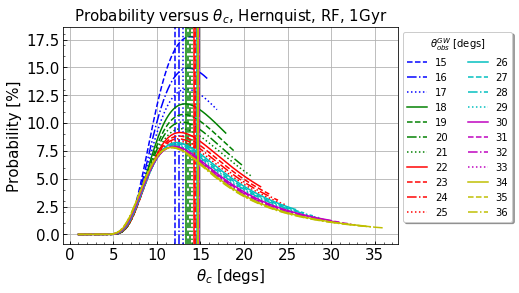

theta_c = 12.1 - 2.4 + 2.0 @ theta_obsGW = 15
theta_c = 12.5 - 2.7 + 2.3 @ theta_obsGW = 16
theta_c = 12.9 - 2.9 + 2.7 @ theta_obsGW = 17
theta_c = 13.2 - 3.1 + 3.1 @ theta_obsGW = 18
theta_c = 13.5 - 3.4 + 3.5 @ theta_obsGW = 19
theta_c = 13.7 - 3.5 + 3.9 @ theta_obsGW = 20
theta_c = 14.0 - 3.7 + 4.3 @ theta_obsGW = 21
theta_c = 14.1 - 3.8 + 4.6 @ theta_obsGW = 22
theta_c = 14.3 - 4.0 + 5.0 @ theta_obsGW = 23
theta_c = 14.4 - 4.1 + 5.4 @ theta_obsGW = 24
theta_c = 14.5 - 4.2 + 5.7 @ theta_obsGW = 25
theta_c = 14.5 - 4.2 + 6.1 @ theta_obsGW = 26
theta_c = 14.6 - 4.3 + 6.4 @ theta_obsGW = 27
theta_c = 14.6 - 4.4 + 6.7 @ theta_obsGW = 28
theta_c = 14.6 - 4.4 + 6.9 @ theta_obsGW = 29
theta_c = 14.7 - 4.5 + 7.2 @ theta_obsGW = 30
theta_c = 14.7 - 4.5 + 7.4 @ theta_obsGW = 31
theta_c = 14.7 - 4.5 + 7.6 @ theta_obsGW = 32
theta_c = 14.6 - 4.5 + 7.8 @ theta_obsGW = 33
theta_c = 14.6 - 4.5 + 8.0 @ theta_obsGW = 34
theta_c = 14.6 - 4.5 + 8.1 @ theta_obsGW = 35
theta_c = 14.6 - 4.6 + 8.3 @ theta

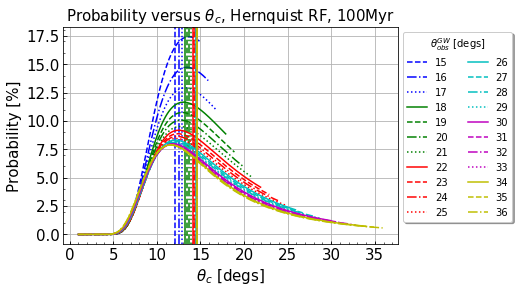

theta_c = 12.1 - 2.4 + 2.0 @ theta_obsGW = 15
theta_c = 12.5 - 2.7 + 2.3 @ theta_obsGW = 16
theta_c = 12.9 - 2.9 + 2.7 @ theta_obsGW = 17
theta_c = 13.2 - 3.2 + 3.1 @ theta_obsGW = 18
theta_c = 13.5 - 3.4 + 3.5 @ theta_obsGW = 19
theta_c = 13.7 - 3.5 + 3.9 @ theta_obsGW = 20
theta_c = 14.0 - 3.7 + 4.3 @ theta_obsGW = 21
theta_c = 14.1 - 3.8 + 4.6 @ theta_obsGW = 22
theta_c = 14.2 - 4.0 + 5.0 @ theta_obsGW = 23
theta_c = 14.4 - 4.1 + 5.4 @ theta_obsGW = 24
theta_c = 14.4 - 4.2 + 5.7 @ theta_obsGW = 25
theta_c = 14.5 - 4.2 + 6.1 @ theta_obsGW = 26
theta_c = 14.6 - 4.3 + 6.4 @ theta_obsGW = 27
theta_c = 14.6 - 4.4 + 6.7 @ theta_obsGW = 28
theta_c = 14.6 - 4.4 + 6.9 @ theta_obsGW = 29
theta_c = 14.6 - 4.5 + 7.2 @ theta_obsGW = 30
theta_c = 14.6 - 4.5 + 7.4 @ theta_obsGW = 31
theta_c = 14.6 - 4.5 + 7.6 @ theta_obsGW = 32
theta_c = 14.6 - 4.5 + 7.8 @ theta_obsGW = 33
theta_c = 14.6 - 4.5 + 8.0 @ theta_obsGW = 34
theta_c = 14.6 - 4.5 + 8.1 @ theta_obsGW = 35
theta_c = 14.6 - 4.6 + 8.3 @ theta

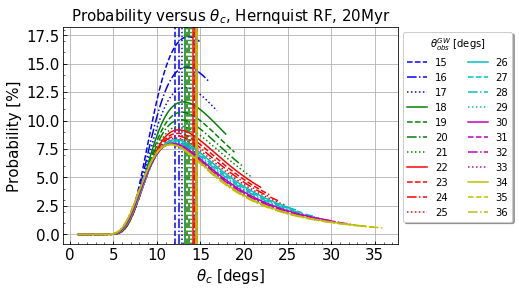

s = 42.5 - 21.7 + 101.2 @ theta_obsGW = 15
s = 37.4 - 18.6 + 85.9 @ theta_obsGW = 16
s = 33.1 - 16.1 + 73.5 @ theta_obsGW = 17
s = 29.7 - 14.0 + 63.4 @ theta_obsGW = 18
s = 26.8 - 12.3 + 55.0 @ theta_obsGW = 19
s = 24.4 - 10.8 + 47.9 @ theta_obsGW = 20
s = 22.4 - 9.8 + 42.7 @ theta_obsGW = 21
s = 20.6 - 8.6 + 37.1 @ theta_obsGW = 22
s = 19.1 - 7.8 + 33.0 @ theta_obsGW = 23
s = 17.8 - 7.1 + 29.4 @ theta_obsGW = 24
s = 16.7 - 6.4 + 26.4 @ theta_obsGW = 25


/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in exp


s = 15.7 - 5.9 + 23.7 @ theta_obsGW = 26
s = 14.8 - 5.4 + 21.4 @ theta_obsGW = 27
s = 14.0 - 5.0 + 19.5 @ theta_obsGW = 28
s = 13.3 - 4.6 + 17.7 @ theta_obsGW = 29
s = 12.7 - 4.3 + 16.2 @ theta_obsGW = 30
s = 12.1 - 4.0 + 14.9 @ theta_obsGW = 31


/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in multiply


s = 11.6 - 3.8 + 13.7 @ theta_obsGW = 32
s = 11.2 - 3.5 + 12.6 @ theta_obsGW = 33
s = 10.8 - 3.3 + 11.7 @ theta_obsGW = 34
s = 10.4 - 3.1 + 10.8 @ theta_obsGW = 35
s = 10.0 - 3.0 + 10.1 @ theta_obsGW = 36


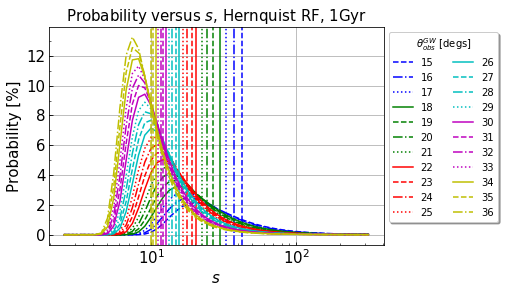

s = 41.6 - 21.2 + 98.6 @ theta_obsGW = 15
s = 36.6 - 18.2 + 83.7 @ theta_obsGW = 16
s = 32.5 - 15.7 + 71.6 @ theta_obsGW = 17
s = 29.1 - 13.7 + 61.7 @ theta_obsGW = 18
s = 26.3 - 12.0 + 53.5 @ theta_obsGW = 19
s = 23.9 - 10.6 + 46.7 @ theta_obsGW = 20
s = 22.0 - 9.5 + 41.5 @ theta_obsGW = 21
s = 20.2 - 8.4 + 36.1 @ theta_obsGW = 22
s = 18.8 - 7.6 + 32.1 @ theta_obsGW = 23
s = 17.5 - 6.9 + 28.6 @ theta_obsGW = 24
s = 16.4 - 6.3 + 25.6 @ theta_obsGW = 25
s = 15.4 - 5.8 + 23.0 @ theta_obsGW = 26
s = 14.6 - 5.3 + 20.8 @ theta_obsGW = 27
s = 13.8 - 4.9 + 18.9 @ theta_obsGW = 28
s = 13.1 - 4.5 + 17.2 @ theta_obsGW = 29
s = 12.5 - 4.2 + 15.7 @ theta_obsGW = 30
s = 12.0 - 3.9 + 14.5 @ theta_obsGW = 31
s = 11.5 - 3.7 + 13.3 @ theta_obsGW = 32
s = 11.0 - 3.5 + 12.3 @ theta_obsGW = 33
s = 10.6 - 3.3 + 11.4 @ theta_obsGW = 34
s = 10.3 - 3.1 + 10.5 @ theta_obsGW = 35
s = 9.9 - 2.9 + 9.9 @ theta_obsGW = 36


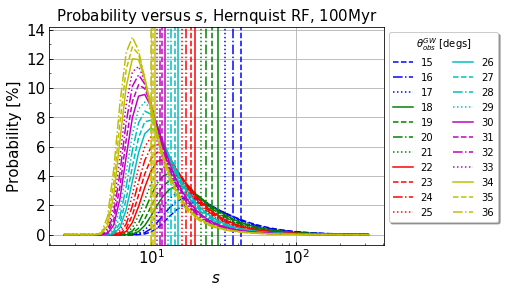

s = 41.5 - 21.1 + 98.1 @ theta_obsGW = 15
s = 36.5 - 18.1 + 83.3 @ theta_obsGW = 16
s = 32.4 - 15.6 + 71.3 @ theta_obsGW = 17
s = 29.0 - 13.6 + 61.4 @ theta_obsGW = 18
s = 26.2 - 11.9 + 53.2 @ theta_obsGW = 19
s = 23.9 - 10.5 + 46.4 @ theta_obsGW = 20
s = 22.0 - 9.5 + 41.3 @ theta_obsGW = 21
s = 20.2 - 8.4 + 35.9 @ theta_obsGW = 22
s = 18.7 - 7.6 + 31.9 @ theta_obsGW = 23
s = 17.5 - 6.9 + 28.5 @ theta_obsGW = 24
s = 16.4 - 6.3 + 25.5 @ theta_obsGW = 25
s = 15.4 - 5.7 + 22.9 @ theta_obsGW = 26
s = 14.5 - 5.3 + 20.7 @ theta_obsGW = 27
s = 13.8 - 4.9 + 18.8 @ theta_obsGW = 28
s = 13.1 - 4.5 + 17.1 @ theta_obsGW = 29
s = 12.5 - 4.2 + 15.7 @ theta_obsGW = 30
s = 12.0 - 3.9 + 14.4 @ theta_obsGW = 31
s = 11.5 - 3.7 + 13.3 @ theta_obsGW = 32
s = 11.0 - 3.4 + 12.2 @ theta_obsGW = 33
s = 10.6 - 3.2 + 11.3 @ theta_obsGW = 34
s = 10.2 - 3.1 + 10.5 @ theta_obsGW = 35
s = 9.9 - 2.9 + 9.8 @ theta_obsGW = 36


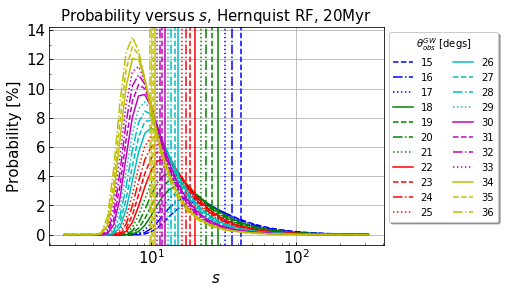

In [9]:
print('Hey user hit 2!')
df = pickRF(data_matrix)   


# for theta_c
        
for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hernquist, RF, 1Gyr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchechterHquist1GyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '100Myr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hernquist RF, 100Myr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchechterHernquist100MyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '20Myr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hernquist RF, 20Myr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchechterHernquist20MyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


# for s

for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '1Gyr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hernquist RF, 1Gyr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchchterHernquist1GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()

for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '100Myr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hernquist RF, 100Myr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHernquist100GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '20Myr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hernquist RF, 20Myr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchchterHernquist20GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()






### constraint plot for Hopkins RF

Hey user hit 6!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:76
theta_c = 11.3 - 2.6 + 2.4 @ theta_obsGW = 15
theta_c = 11.6 - 2.8 + 2.8 @ theta_obsGW = 16
theta_c = 11.8 - 3.0 + 3.2 @ theta_obsGW = 17
theta_c = 12.0 - 3.1 + 3.6 @ theta_obsGW = 18
theta_c = 12.2 - 3.3 + 4.0 @ theta_obsGW = 19
theta_c = 12.4 - 3.4 + 4.3 @ theta_obsGW = 20
theta_c = 12.5 - 3.5 + 4.7 @ theta_obsGW = 21
theta_c = 12.5 - 3.6 + 5.0 @ theta_obsGW = 22
theta_c = 12.6 - 3.7 + 5.3 @ theta_obsGW = 23
theta_c = 12.7 - 3.7 + 5.6 @ theta_obsGW = 24
theta_c = 12.7 - 3.8 + 5.9 @ theta_obsGW = 25
theta_c = 12.7 - 3.8 + 6.1 @ theta_obsGW = 26
theta_c = 12.7 - 3.9 + 6.4 @ theta_obsGW = 27
theta_c = 12.7 - 3.9 + 6.6 @ theta_obsGW = 28
theta_c = 12.7 - 3.9 + 6.7 @ theta_obsGW = 29
theta_c = 12.7 - 3.9 + 6.9 @ theta_obsGW = 30
theta_c = 12.7 - 3.9 + 7.0 @ theta_obsGW = 31
theta_c = 12.6 - 3.9 + 7.1 @ theta_obsGW = 32
theta_c = 12.6 - 3.9 + 7.2 @ theta_obsGW = 33
theta_c = 12.6 - 3.9 + 7.3 @ theta_

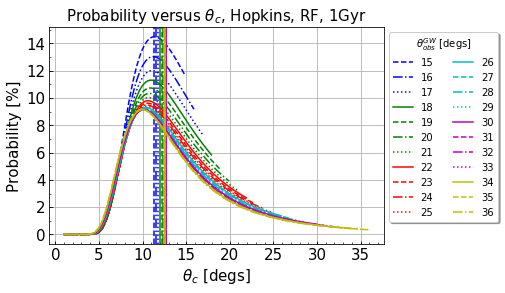

theta_c = 10.6 - 2.6 + 2.7 @ theta_obsGW = 15
theta_c = 10.9 - 2.8 + 3.1 @ theta_obsGW = 16
theta_c = 11.1 - 2.9 + 3.5 @ theta_obsGW = 17
theta_c = 11.2 - 3.1 + 3.9 @ theta_obsGW = 18
theta_c = 11.3 - 3.2 + 4.2 @ theta_obsGW = 19
theta_c = 11.4 - 3.3 + 4.5 @ theta_obsGW = 20
theta_c = 11.5 - 3.3 + 4.8 @ theta_obsGW = 21
theta_c = 11.5 - 3.4 + 5.1 @ theta_obsGW = 22
theta_c = 11.5 - 3.4 + 5.4 @ theta_obsGW = 23
theta_c = 11.6 - 3.5 + 5.6 @ theta_obsGW = 24
theta_c = 11.6 - 3.5 + 5.8 @ theta_obsGW = 25
theta_c = 11.6 - 3.5 + 6.0 @ theta_obsGW = 26
theta_c = 11.6 - 3.5 + 6.1 @ theta_obsGW = 27
theta_c = 11.5 - 3.5 + 6.3 @ theta_obsGW = 28
theta_c = 11.5 - 3.6 + 6.4 @ theta_obsGW = 29
theta_c = 11.5 - 3.6 + 6.5 @ theta_obsGW = 30
theta_c = 11.5 - 3.6 + 6.6 @ theta_obsGW = 31
theta_c = 11.4 - 3.6 + 6.7 @ theta_obsGW = 32
theta_c = 11.4 - 3.6 + 6.7 @ theta_obsGW = 33
theta_c = 11.4 - 3.6 + 6.8 @ theta_obsGW = 34
theta_c = 11.4 - 3.6 + 6.8 @ theta_obsGW = 35
theta_c = 11.3 - 3.5 + 6.8 @ theta

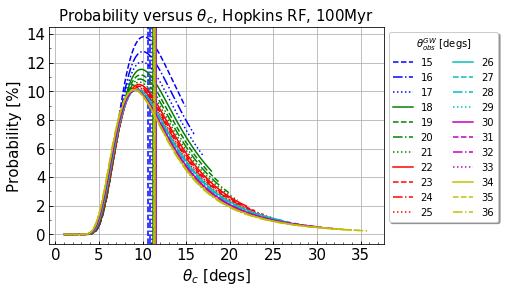

theta_c = 10.3 - 2.6 + 2.9 @ theta_obsGW = 15
theta_c = 10.5 - 2.8 + 3.2 @ theta_obsGW = 16
theta_c = 10.7 - 2.9 + 3.6 @ theta_obsGW = 17
theta_c = 10.8 - 3.0 + 4.0 @ theta_obsGW = 18
theta_c = 10.9 - 3.1 + 4.3 @ theta_obsGW = 19
theta_c = 11.0 - 3.2 + 4.6 @ theta_obsGW = 20
theta_c = 11.0 - 3.2 + 4.9 @ theta_obsGW = 21
theta_c = 11.1 - 3.3 + 5.1 @ theta_obsGW = 22
theta_c = 11.1 - 3.3 + 5.3 @ theta_obsGW = 23
theta_c = 11.1 - 3.3 + 5.5 @ theta_obsGW = 24
theta_c = 11.1 - 3.4 + 5.7 @ theta_obsGW = 25
theta_c = 11.1 - 3.4 + 5.9 @ theta_obsGW = 26
theta_c = 11.1 - 3.4 + 6.0 @ theta_obsGW = 27
theta_c = 11.0 - 3.4 + 6.1 @ theta_obsGW = 28
theta_c = 11.0 - 3.4 + 6.2 @ theta_obsGW = 29
theta_c = 11.0 - 3.4 + 6.3 @ theta_obsGW = 30
theta_c = 11.0 - 3.4 + 6.4 @ theta_obsGW = 31
theta_c = 10.9 - 3.4 + 6.4 @ theta_obsGW = 32
theta_c = 10.9 - 3.4 + 6.5 @ theta_obsGW = 33
theta_c = 10.9 - 3.4 + 6.5 @ theta_obsGW = 34
theta_c = 10.8 - 3.4 + 6.5 @ theta_obsGW = 35
theta_c = 10.8 - 3.4 + 6.6 @ theta

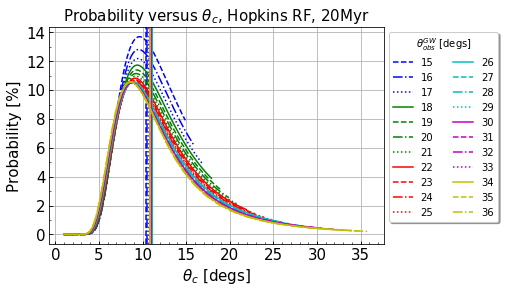

s = 31.3 - 14.9 + 67.4 @ theta_obsGW = 15
s = 27.7 - 12.7 + 56.8 @ theta_obsGW = 16
s = 24.7 - 11.0 + 48.3 @ theta_obsGW = 17
s = 22.3 - 9.5 + 41.1 @ theta_obsGW = 18
s = 20.3 - 8.4 + 35.8 @ theta_obsGW = 19
s = 18.6 - 7.5 + 31.1 @ theta_obsGW = 20
s = 17.2 - 6.7 + 27.2 @ theta_obsGW = 21
s = 16.0 - 6.0 + 24.0 @ theta_obsGW = 22
s = 14.9 - 5.4 + 21.3 @ theta_obsGW = 23
s = 14.0 - 5.0 + 19.0 @ theta_obsGW = 24
s = 13.2 - 4.5 + 17.0 @ theta_obsGW = 25
s = 12.5 - 4.2 + 15.3 @ theta_obsGW = 26
s = 11.9 - 3.9 + 14.0 @ theta_obsGW = 27
s = 11.4 - 3.6 + 12.6 @ theta_obsGW = 28
s = 10.9 - 3.3 + 11.5 @ theta_obsGW = 29
s = 10.4 - 3.1 + 10.6 @ theta_obsGW = 30
s = 10.0 - 2.9 + 9.7 @ theta_obsGW = 31
s = 9.7 - 2.8 + 9.0 @ theta_obsGW = 32
s = 9.3 - 2.6 + 8.3 @ theta_obsGW = 33
s = 9.0 - 2.5 + 7.7 @ theta_obsGW = 34
s = 8.8 - 2.3 + 7.2 @ theta_obsGW = 35
s = 8.5 - 2.2 + 6.8 @ theta_obsGW = 36


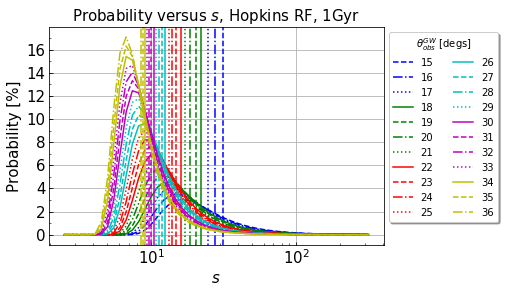

s = 26.1 - 11.8 + 51.9 @ theta_obsGW = 15
s = 23.3 - 10.1 + 43.7 @ theta_obsGW = 16
s = 20.9 - 8.7 + 37.0 @ theta_obsGW = 17
s = 18.9 - 7.6 + 31.6 @ theta_obsGW = 18
s = 17.3 - 6.7 + 27.3 @ theta_obsGW = 19
s = 16.0 - 6.0 + 23.7 @ theta_obsGW = 20
s = 14.9 - 5.4 + 20.8 @ theta_obsGW = 21
s = 13.9 - 4.8 + 18.3 @ theta_obsGW = 22
s = 13.0 - 4.4 + 16.2 @ theta_obsGW = 23
s = 12.3 - 4.0 + 14.5 @ theta_obsGW = 24
s = 11.7 - 3.7 + 13.0 @ theta_obsGW = 25
s = 11.1 - 3.4 + 11.8 @ theta_obsGW = 26
s = 10.6 - 3.2 + 10.7 @ theta_obsGW = 27
s = 10.1 - 3.0 + 9.7 @ theta_obsGW = 28
s = 9.7 - 2.8 + 8.9 @ theta_obsGW = 29
s = 9.4 - 2.6 + 8.2 @ theta_obsGW = 30
s = 9.0 - 2.5 + 7.6 @ theta_obsGW = 31
s = 8.7 - 2.3 + 7.0 @ theta_obsGW = 32
s = 8.5 - 2.2 + 6.5 @ theta_obsGW = 33
s = 8.2 - 2.1 + 6.1 @ theta_obsGW = 34
s = 8.0 - 2.0 + 5.7 @ theta_obsGW = 35
s = 7.8 - 1.9 + 5.4 @ theta_obsGW = 36


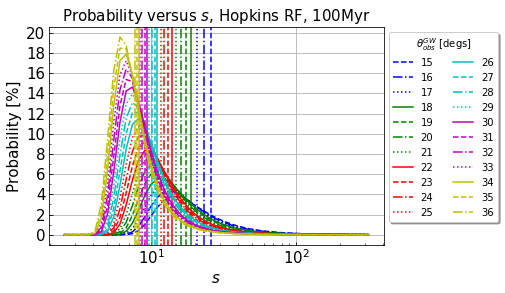

s = 24.2 - 10.6 + 46.1 @ theta_obsGW = 15
s = 21.6 - 9.1 + 38.7 @ theta_obsGW = 16
s = 19.4 - 7.9 + 32.8 @ theta_obsGW = 17
s = 17.7 - 6.9 + 28.0 @ theta_obsGW = 18
s = 16.2 - 6.1 + 24.2 @ theta_obsGW = 19
s = 15.0 - 5.4 + 21.0 @ theta_obsGW = 20
s = 14.0 - 4.9 + 18.4 @ theta_obsGW = 21
s = 13.1 - 4.4 + 16.2 @ theta_obsGW = 22
s = 12.3 - 4.0 + 14.4 @ theta_obsGW = 23
s = 11.6 - 3.7 + 12.9 @ theta_obsGW = 24
s = 11.0 - 3.4 + 11.6 @ theta_obsGW = 25
s = 10.5 - 3.1 + 10.5 @ theta_obsGW = 26
s = 10.1 - 2.9 + 9.5 @ theta_obsGW = 27
s = 9.7 - 2.7 + 8.7 @ theta_obsGW = 28
s = 9.3 - 2.6 + 8.0 @ theta_obsGW = 29
s = 8.9 - 2.4 + 7.4 @ theta_obsGW = 30
s = 8.6 - 2.3 + 6.8 @ theta_obsGW = 31
s = 8.4 - 2.2 + 6.4 @ theta_obsGW = 32
s = 8.1 - 2.0 + 5.9 @ theta_obsGW = 33
s = 7.9 - 2.0 + 5.5 @ theta_obsGW = 34
s = 7.7 - 1.9 + 5.2 @ theta_obsGW = 35
s = 7.5 - 1.8 + 4.9 @ theta_obsGW = 36


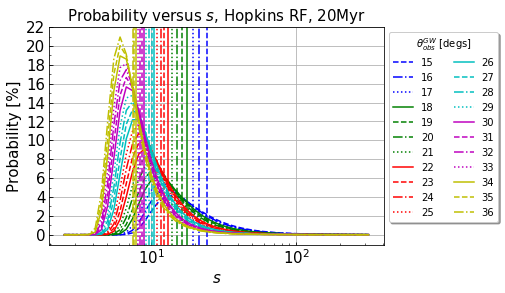

In [10]:
print('Hey user hit 6!')

df = pickRF(data_matrix)


# for theta_c
        
for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hopkins, RF, 1Gyr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('SchechterHopkins1GyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '100Myr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hopkins RF, 100Myr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchechterHopkins100MyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '20Myr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hopkins RF, 20Myr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchechterHopkins20MyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


# for s

for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '1Gyr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hopkins RF, 1Gyr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchechterHopkins1GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()

for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '100Myr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hopkins RF, 100Myr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchechterHopkins100MyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(15, 37, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '20Myr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hopkins RF, 20Myr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProSchechterHopkins20MyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()





### LRD 
##### Find the LRDs. Hernquist 1Gyr has a peak at theta_c = 10 degs. Hernquist 100Myr has a peak at theta_c = 12 degs.
##### At this stage, the uncertainty of LF has already been averaged out. 
##### the contribution of theta_obsGW is sub-dominant. (less than 5%)
##### I choose theta_obsGW = 30 degs
##### So uncertainty of LRD is due to the uncertainty of LF 
##### at a fixed RF, at a fixed t_min
##### The Hernquist RF gives 1.4 times greater LRD than the Hopkins does
##### theta_c = 9 degs gives 2.6 times, theta_c = 22 degs gives 0.5 times as much LRD as that of theta_c = 9 degs

In [18]:
# the peak of theta_c 
peak_theta_c = 10
theta_obsGW = 30
# pick up Hernquist RF, Hey user, please hit 2! since Hernquist RF's label is 2 
print('Hey user, please hit 2!')
# Hernquist RF
dfHer = pickRF(data_matrix)
# Hernquist, 1Gyr, the mean value 
Her1Gyrmean = dfHer[(dfHer['label_tmin']=='1')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Her1Gyrlow = (Her1Gyrmean-dfHer[(dfHer['label_tmin']=='1')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Her1Gyrup = (Her1Gyrmean+dfHer[(dfHer['label_tmin']=='1')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).max()

# Hernquist, 100Myr, the mean value
Her100Myrmean = dfHer[(dfHer['label_tmin']=='2')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Her100Myrlow = (Her100Myrmean-dfHer[(dfHer['label_tmin']=='2')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Her100Myrup = (Her100Myrmean+dfHer[(dfHer['label_tmin']=='2')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).max()

# Hernquist, 20Myr, the mean value
Her20Myrmean = dfHer[(dfHer['label_tmin']=='3')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Her20Myrlow = (Her20Myrmean-dfHer[(dfHer['label_tmin']=='3')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Her20Myrup = (Her20Myrmean+dfHer[(dfHer['label_tmin']=='3')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).max()


# pick up Hopkins RF, Hey user, please hit 6!
print('pick up Hopkins RF, Hey user, please hit 6!')
dfHop = pickRF(data_matrix)
# Hopkins, 1Gyr, the mean value 
Hop1Gyrmean = dfHop[(dfHop['label_tmin']=='1')  & (dfHop['theta_c']==peak_theta_c) & (dfHop['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Hop1Gyrlow = (Hop1Gyrmean-dfHop[(dfHop['label_tmin']=='1')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Hop1Gyrup = (Hop1Gyrmean+dfHop[(dfHop['label_tmin']=='1')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).max()

# Hopkins, 100Myr, the mean value
Hop100Myrmean = dfHop[(dfHop['label_tmin']=='2')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Hop100Myrlow = (Hop100Myrmean-dfHop[(dfHop['label_tmin']=='2')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Hop100Myrup = (Hop100Myrmean+dfHop[(dfHop['label_tmin']=='2')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).max()


# Hopkins, 20Myr, the mean value
Hop20Myrmean = dfHop[(dfHop['label_tmin']=='3')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Hop20Myrlow = (Hop20Myrmean-dfHop[(dfHop['label_tmin']=='3')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Hop20Myrup = (Hop20Myrmean+dfHop[(dfHop['label_tmin']=='3')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).max()

# the list of the mean vlaues
HerHopmean = [Her1Gyrmean, Her100Myrmean, Her20Myrmean, Hop1Gyrmean, Hop100Myrmean, Hop20Myrmean]
# the list of the lowest vlaues 
HerHoplow = [Her1Gyrlow, Her100Myrlow, Her20Myrlow, Hop1Gyrlow, Hop100Myrlow, Hop20Myrlow]
# the listof the highest values 
HerHopup = [Her1Gyrup, Her100Myrup, Her20Myrup, Hop1Gyrup, Hop100Myrup, Hop20Myrup]
# the lower error 
HerHoplowerr = np.array(HerHopmean)-np.array(HerHoplow)
# the upper error
HerHopuperr = np.array(HerHoplow) + np.array(HerHopmean)



Hey user, please hit 2!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:72
pick up Hopkins RF, Hey user, please hit 6!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:76


In [19]:
print(dfHer[(dfHer['label_tmin']=='1')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDmean'].mean())
print(dfHop[(dfHop['label_tmin']=='3')  & (dfHop['theta_c']==peak_theta_c) & (dfHop['theta_obsGW']==theta_obsGW)]['LRDmean'].mean())




4758.140223078787
2713.1283235662654


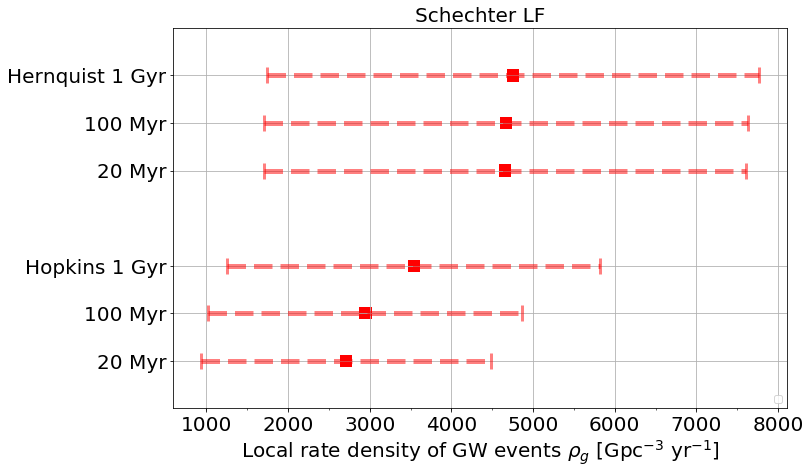

In [20]:
# plot!

def plot_GW(ave_v,err_v):
    plt.figure(figsize=(11, 7))
    ############################################
    y = [5., 4.5, 4., 3., 2.5, 2.]
    eb1=plt.errorbar(ave_v,y,xerr=err_v,fmt='none',ecolor='red', linewidth=3, edgecolor='red', capsize=8, capthick=3. ,elinewidth=5, alpha=0.5, capstyle=':')
    eb1[-1][0].set_linestyle('--')
    plt.scatter(ave_v, y,marker='s', s=150, color='r', edgecolor='none' , alpha=1)
    plt.legend(loc='lower right')
    #plt.xlabel('Power law index $s$')
    plt.xlabel(r'Local rate density of GW events $\rho_{g}$ [Gpc$^{-3}$ yr$^{-1}}$]', size=20.)
    plt.yticks(y,['Hernquist 1 Gyr', '100 Myr','20 Myr','Hopkins 1 Gyr', '100 Myr', '20 Myr'], size=20)
    plt.xticks(fontsize=20)
    #plt.ylabel(u"star formation rate with differnet minimum delay times")
    #plt.title(r'Power law index, $\theta_{obs}^{GW}=28^{\circ}$, $\theta_{c}^{GW}=10^{\circ}$, size=20')
    #plt.title(r'Broken power LF, $\theta_{c}$=%i$^{\circ}$' % peak_theta_c, size=20)
    plt.title('Schechter LF', size=20)
    plt.ylim(1.5, 5.5)
    plt.grid()
    plt.axes().xaxis.set_minor_locator(MultipleLocator(500))
    plt.axes().xaxis.set_tick_params(which='minor', right = False)
    plt.show()
    return None 

#print(HerHopmean)
plot_GW(HerHopmean, [HerHoplowerr,HerHoplowerr])

## number of GW events in the future observation runs for single interferomter

### N_g = LRD * VT
VT is fixed 
so error is due to the LRD 

/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in exp


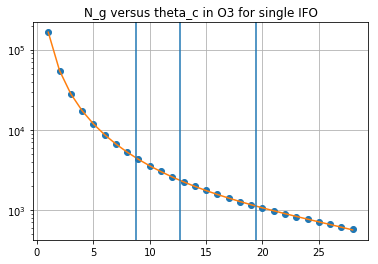

-322.6106280578051
4.933553720082223
5.32825474018421
2.8717700758687568


In [38]:
LRD = df[(df['label_tmin']=='1') &  (df['label_RF'] == '6') & (df['theta_obsGW']==29)]['LRDmean'].values.tolist()
theta_c = df[(df['label_tmin']=='1') &  (df['label_RF'] == '6') & (df['theta_obsGW']==29)]['theta_c'].values.tolist()
N_g =  (np.array(LRD)*(4*3.14/3.*(0.12)**3*0.8)).tolist()


#==================
def cda(f,x,h):
    '''
    find the 1st order derivative of a given function 
    '''
    return (f(x+h)-f(x-h))/(2*h)
    
#+++++++++++++++++++++++++++++++++++++
# functions for evaluating the error |
#+++++++++++++++++++++++++++++++++++++

def avg(x):
    return sum(x)/float(len(x))

def sst(x):
    sum=0.0
    xbar=avg(x)
    for i in range(len(x)):
        sum += (x[i]-xbar)**2
    return sum

def ssr(x,y,model,params):
    sum = 0.0
    for i in range(len(y)):
        sum += (y[i] - model(x[i],*params))**2
    return sum

def fitstats(fit, model):
    #Fit statistics
    fitparams=fit[0]
    cov=fit[1]                      #Covariance matrix
    dof=len(xdata)-len(fitparams)   #degrees of freedom
    chisqr=ssr(xdata,ydata,model,fitparams)     #chi-square is sum of squares of diagonal covariance
    errbars=20

    #Computer uncertainties in estimated parameters from covariance matrix and reduced chisqr
    del_params=[]
    for i in range(len(fitparams)):
        del_params.append(np.sqrt(cov[i,i]*np.sqrt(chisqr/dof)))

    return chisqr,del_params
    
     
def model(x, a, b, c, d, e, f):
    '''
    The phenominological model for NSNS events as a function of theta_c
    '''
    return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

#++++++++++++
# fitting!  |
#++++++++++++

fit = curve_fit(model, theta_c, LRD)

#++++++++++++++++++++++
# bestfitted function |
#++++++++++++++++++++++
    
def model_best(x, a=fit[0][0], b=fit[0][1], c=fit[0][2], d=fit[0][3], e=fit[0][4], f=fit[0][5]):
    '''
    The phenominological model for NSNS events as a function of theta_c
    '''
    return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3


# ===== plot ========
plt.plot(theta_c, LRD, 'o')
#plt.plot(theta_c, N_g, 'o')
plt.plot(theta_c, model_best(np.array(theta_c)))
plt.yscale('log')
plt.axvline(12.7)
plt.axvline(8.8)
plt.axvline(19.4)
plt.title('N_g versus theta_c in O3 for single IFO')
plt.grid()
plt.show()

a = cda(model_best, 12.7, 0.01)
print(a)
print(-a*6.7*(4*3.14/3.*(0.088)**3*0.8))
print(model_best(12.7)*(4*3.14/3.*(0.088)**3*0.8))
print(-a*3.9*(4*3.14/3.*(0.088)**3*0.8))


# find the local rate densities for the Hernquist RF

In [16]:
print('Hey user hit 2!')
df = pickRF(data_matrix)   
    
def LRD_theta_c(df, tmin, theta_obsGW):
    '''
    Providing local rate density for a theta_c with given df, t_min, theta_obsGW
    USAGE: LRD_ave, LRD_std = distribution_theta_c(df, '1Gyr', theta_obsGW=29.)
    (method)
    for theta_c
    1. Extrapolate the number of NSNS events in O2, l, as a functiono of theta_c
    2. give the average local rate density as a function of  a theta_c
    3. give the standard deviation of local rate density as a function of a theta_c
    '''
    # VT for NSNS in O2
    VT = 9.1*10**(-4)
    # fraction of NSNS to NSNS + NSBH 
    r_nsns = 5./6.
    
    
    # determine which tmin
    if tmin == '1Gyr':
        tmin_num = '1'
    elif tmin == '100Myr':
        tmin_num = '2'
    elif tmin == '20Myr':
        tmin_num = '3'
    
    #======================================
    # getting the values of theta_c and the number of NSNS events in O2
    #======================================
    
    # the theta_c data series, theta_c starts with 0.1 degs
    xdata = df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['theta_c'].values.tolist()
    # the NSNS average events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    ydata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDmean']*r_nsns*VT).values.tolist()
    # the NSNS standard deviation events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    edata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDstd']*r_nsns*VT).values.tolist()


   
    #+++++++++++++++++++++++++++++++++++++
    # functions for evaluating the error |
    #+++++++++++++++++++++++++++++++++++++

   
    def model(x, a, b, c, d, e, f):
        '''
        The phenominological model for NSNS events l as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #++++++++++++
    # fitting!  |
    #++++++++++++

    fit_ave = curve_fit(model, xdata, ydata)  # fitting for average value 
    fit_std = curve_fit(model, xdata, edata)  # fitting for standard deviation value 

    #++++++++++++++++++++++
    # bestfitted function |
    #++++++++++++++++++++++
    
    def model_best_ave(x, a=fit_ave[0][0], b=fit_ave[0][1], c=fit_ave[0][2], d=fit_ave[0][3], e=fit_ave[0][4], f=fit_ave[0][5]):
        '''
        The phenominological model for local rate density as a function of theta_c
        as l = r_nsns*VT*LRD
        '''
        return (a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3)/(r_nsns*VT)
    
    
    def model_best_std(x, a=fit_std[0][0], b=fit_std[0][1], c=fit_std[0][2], d=fit_std[0][3], e=fit_std[0][4], f=fit_std[0][5]):
        '''
        The phenominological model for local rate density STANDARD DEVIATION as a function of theta_c
        as l = r_nsns*VT*LRD
        '''
        return (a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3)/(r_nsns*VT)

    return model_best_ave, model_best_std

    




Hey user hit 2!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:72


In [17]:
print('Hernquist RF')
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(14.8), LRD_std(14.8), 14.8))
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(14.8+6.9), LRD_std(14.8+6.9), 14.8+6.9))
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(14.8-4.5), LRD_std(14.8-4.5), 14.8-4.5))
print('-'*50)
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(14.6), LRD_std(14.6), 14.6))
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(14.6+6.9), LRD_std(14.6+6.9), 14.6+6.9))
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(14.6-4.4), LRD_std(14.6-4.4), 14.6-4.4))
print('-'*50)
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(14.6), LRD_std(14.6), 14.6))
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(14.6+6.9), LRD_std(14.6+6.9), 14.6+6.9))
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(14.6-4.4), LRD_std(14.6-4.4), 14.6-4.4))






Hernquist RF
LRD = 2424 +/- 1530 at theta_c = 14.8 @ t_m = 1Gyr
LRD = 1246 +/- 785 at theta_c = 21.7 @ t_m = 1Gyr
LRD = 4533 +/- 2867 at theta_c = 10.3 @ t_m = 1Gyr
--------------------------------------------------
LRD = 2434 +/- 1539 at theta_c = 14.6 @ t_m = 100Myr
LRD = 1243 +/- 784 at theta_c = 21.5 @ t_m = 100Myr
LRD = 4525 +/- 2867 at theta_c = 10.2 @ t_m = 100Myr
--------------------------------------------------
LRD = 2426 +/- 1535 at theta_c = 14.6 @ t_m = 20Myr
LRD = 1239 +/- 782 at theta_c = 21.5 @ t_m = 20Myr
LRD = 4511 +/- 2859 at theta_c = 10.2 @ t_m = 20Myr


/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in exp


In [18]:
print('Hey user hit 6!')
df = pickRF(data_matrix)   
    
def LRD_theta_c(df, tmin, theta_obsGW):
    '''
    Providing local rate density for a theta_c with given df, t_min, theta_obsGW
    USAGE: LRD_ave, LRD_std = distribution_theta_c(df, '1Gyr', theta_obsGW=29.)
    (method)
    for theta_c
    1. Extrapolate the number of NSNS events in O2, l, as a functiono of theta_c
    2. give the average local rate density as a function of  a theta_c
    3. give the standard deviation of local rate density as a function of a theta_c
    '''
    # VT for NSNS in O2
    VT = 9.1*10**(-4)
    # fraction of NSNS to NSNS + NSBH 
    r_nsns = 5./6.
    
    
    # determine which tmin
    if tmin == '1Gyr':
        tmin_num = '1'
    elif tmin == '100Myr':
        tmin_num = '2'
    elif tmin == '20Myr':
        tmin_num = '3'
    
    #======================================
    # getting the values of theta_c and the number of NSNS events in O2
    #======================================
    
    # the theta_c data series, theta_c starts with 0.1 degs
    xdata = df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['theta_c'].values.tolist()
    # the NSNS average events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    ydata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDmean']*r_nsns*VT).values.tolist()
    # the NSNS standard deviation events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    edata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDstd']*r_nsns*VT).values.tolist()


   
    #+++++++++++++++++++++++++++++++++++++
    # functions for evaluating the error |
    #+++++++++++++++++++++++++++++++++++++

   
    def model(x, a, b, c, d, e, f):
        '''
        The phenominological model for NSNS events l as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #++++++++++++
    # fitting!  |
    #++++++++++++

    fit_ave = curve_fit(model, xdata, ydata)  # fitting for average value 
    fit_std = curve_fit(model, xdata, edata)  # fitting for standard deviation value 

    #++++++++++++++++++++++
    # bestfitted function |
    #++++++++++++++++++++++
    
    def model_best_ave(x, a=fit_ave[0][0], b=fit_ave[0][1], c=fit_ave[0][2], d=fit_ave[0][3], e=fit_ave[0][4], f=fit_ave[0][5]):
        '''
        The phenominological model for local rate density as a function of theta_c
        as l = r_nsns*VT*LRD
        '''
        return (a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3)/(r_nsns*VT)
    
    
    def model_best_std(x, a=fit_std[0][0], b=fit_std[0][1], c=fit_std[0][2], d=fit_std[0][3], e=fit_std[0][4], f=fit_std[0][5]):
        '''
        The phenominological model for local rate density STANDARD DEVIATION as a function of theta_c
        as l = r_nsns*VT*LRD
        '''
        return (a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3)/(r_nsns*VT)

    return model_best_ave, model_best_std

    






Hey user hit 6!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:76


In [19]:
print('Hopkins RF')
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(12.7), LRD_std(12.7), 12.7))
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(12.7+6.7), LRD_std(12.7+6.7), 12.7+6.7))
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(12.7-3.9), LRD_std(12.7-3.9), 12.7-3.9))
print('-'*50)
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(11.5), LRD_std(11.5), 11.5))
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(11.5+6.4), LRD_std(11.5+6.4), 11.5+6.4))
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(11.5-3.6), LRD_std(11.5-3.6), 11.5-3.6))
print('-'*50)
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(11.), LRD_std(11.), 11.))
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(11.+6.2), LRD_std(11.+6.2), 11.+6.2))
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(11.-3.4), LRD_std(11.-3.4), 11.-3.4))







Hopkins RF
LRD = 2339 +/- 1509 at theta_c = 12.7 @ t_m = 1Gyr
LRD = 1125 +/- 725 at theta_c = 19.4 @ t_m = 1Gyr
LRD = 4445 +/- 2870 at theta_c = 8.8 @ t_m = 1Gyr
--------------------------------------------------
LRD = 2312 +/- 1507 at theta_c = 11.5 @ t_m = 100Myr
LRD = 1073 +/- 699 at theta_c = 17.9 @ t_m = 100Myr
LRD = 4480 +/- 2923 at theta_c = 7.9 @ t_m = 100Myr
--------------------------------------------------
LRD = 2300 +/- 1505 at theta_c = 11.0 @ t_m = 20Myr
LRD = 1058 +/- 692 at theta_c = 17.2 @ t_m = 20Myr
LRD = 4419 +/- 2895 at theta_c = 7.6 @ t_m = 20Myr
